#**pH Level Forecasting - Classification**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read data into dataframe variable df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pH Level Forecasting/Dataset_new.csv')
df.sample(5)

,Unnamed: 0,Temp (oC),pH,SEC (µS/cm),Turbidity (<NTU),Total Iron (mg/l),Titration 1,Titration 2,N_VALUE,Tryptophan_Probe_µgL,Final HCO3
133,133,27.8,7.26,906.10,1.05,0.020,403.0,405.0,1.60,0.80,463.245154
1,1,22.4,5.51,46.96,0.08,-0.003,41.0,44.0,0.16,0.10,14.506888
73,73,26.2,6.76,391.10,0.38,0.008,185.0,188.0,1.60,0.36,135.925881
87,87,26.7,6.87,486.40,0.45,0.010,218.0,220.0,1.60,0.50,176.764598
80,80,26.6,6.81,447.30,0.40,0.010,198.0,201.0,1.60,0.40,156.040473


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Temp (oC),pH,SEC (µS/cm),Turbidity (<NTU),Total Iron (mg/l),Titration 1,Titration 2,N_VALUE,Tryptophan_Probe_µgL,Final HCO3
0,22.4,6.815,31.56,0.08,-0.007,28.0,26.0,0.16,0.1,10.362063
1,22.4,5.510,46.96,0.08,-0.003,41.0,44.0,0.16,0.1,14.506888
2,23.1,5.650,59.19,0.11,-0.001,44.0,46.0,0.16,0.1,17.310740
3,23.3,5.680,73.56,0.12,0.000,50.0,48.0,0.16,0.1,19.261246
4,23.4,5.810,78.68,0.14,0.000,50.0,49.0,0.16,0.1,21.211752


In [4]:
df.shape

(162, 10)

In [5]:
# pH Level Classification
def classify_pH(value):
    if 6.0 <= value <= 9.5:
        return 1  # Good water quality
    else:
        return 0  # Bad water quality

# Apply the function to create the 'pH_class' column
df['pH_class'] = df['pH'].apply(lambda x: classify_pH(x))

# Display the updated DataFrame
df.sample(10)

,Temp (oC),pH,SEC (µS/cm),Turbidity (<NTU),Total Iron (mg/l),Titration 1,Titration 2,N_VALUE,Tryptophan_Probe_µgL,Final HCO3,pH_class
62,25.5,6.68,334.6,0.33,0.003,166.0,164.0,0.16,0.30,116.420822,1
160,29.2,7.77,449.4,0.40,0.010,198.5,202.5,1.60,0.41,156.650006,1
138,28.0,7.33,1053.0,1.22,0.020,459.0,452.0,1.60,0.92,512.007802,1
68,25.8,6.73,363.6,0.36,0.006,177.0,180.0,1.60,0.30,127.514324,1
150,28.5,7.58,1272.0,0.40,0.040,198.5,202.5,1.60,1.30,685.115202,1
91,26.8,6.93,509.2,0.48,0.010,228.0,230.0,1.60,0.50,188.955260,1
140,28.2,7.34,1072.0,1.27,0.021,470.0,469.0,1.60,1.00,515.665001,1
29,24.4,6.22,183.2,0.24,0.000,109.0,108.0,0.16,0.20,57.418018,1
115,27.3,7.07,681.5,0.72,0.014,310.0,314.0,1.60,0.70,314.519078,1
158,29.0,7.69,449.4,0.40,0.010,198.5,202.5,1.60,0.41,156.650006,1


In [6]:
df.dtypes

Temp (oC)               float64
pH                      float64
SEC (µS/cm)             float64
Turbidity (<NTU)        float64
Total Iron (mg/l)       float64
Titration 1             float64
Titration 2             float64
N_VALUE                 float64
Tryptophan_Probe_µgL    float64
Final HCO3              float64
pH_class                  int64
dtype: object

In [7]:
# input data
X = df.drop(['pH','pH_class'], axis=1)
# target variable
y = df.pH_class

In [8]:
X.sample(5)

,Temp (oC),SEC (µS/cm),Turbidity (<NTU),Total Iron (mg/l),Titration 1,Titration 2,N_VALUE,Tryptophan_Probe_µgL,Final HCO3
98,27.0,540.5,0.53,0.01,251.0,244.0,1.60,0.54,211.995611
58,25.2,319.8,0.31,0.00,160.0,155.0,0.16,0.30,109.715958
22,24.1,161.5,0.20,0.00,82.0,84.0,0.16,0.20,45.714982
31,24.5,188.8,0.24,0.00,111.0,113.0,0.16,0.22,59.978057
101,27.0,578.3,0.59,0.01,265.0,265.0,1.60,0.54,236.498842


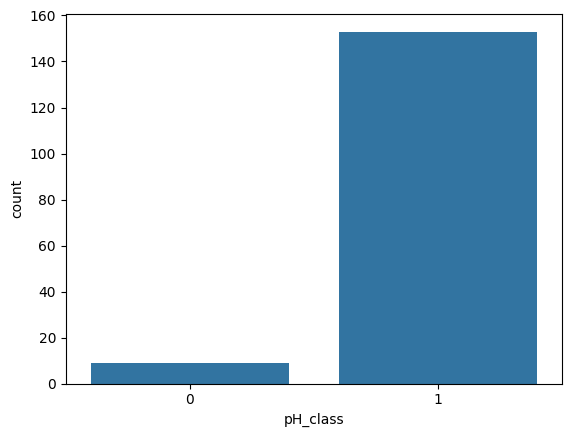

In [9]:
# check distribution of the pH Class
ax = sns.countplot(x = y, data = df)

In [10]:
X_bal = X.copy()
y_bal = y.copy()

In [11]:
# Balancing the data with SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

# initialize and fit SMOTE
Smote = SMOTE(random_state=42)
X_smote_over, y_smote_over = Smote.fit_resample(X_bal, y_bal)

# check new distribution
y_smote_over.value_counts()

pH_class
1    153
0    153
Name: count, dtype: int64

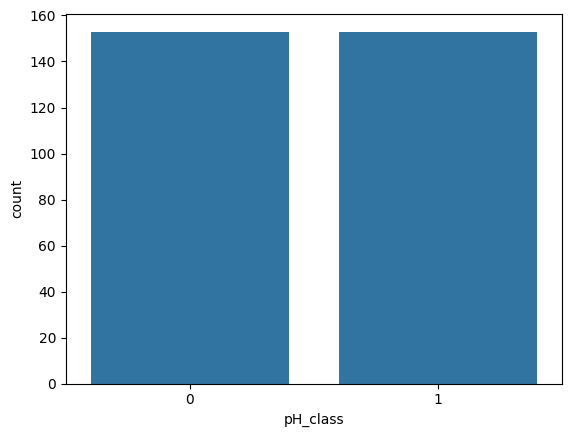

In [12]:
# check New distribution of the pH Class
ax = sns.countplot(x = y_smote_over, data = df)

In [13]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smote_over, y_smote_over, test_size=0.20, random_state=42, stratify=y_smote_over)

In [14]:
# Number of classes in training Data
y_train.value_counts()

pH_class
1    122
0    122
Name: count, dtype: int64

###**Logistic Regression**

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62


Confusion Matrix:
[[31  0]
 [ 0 31]]

Evaluation Metrics:
      Metric  Score
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1-Score    1.0


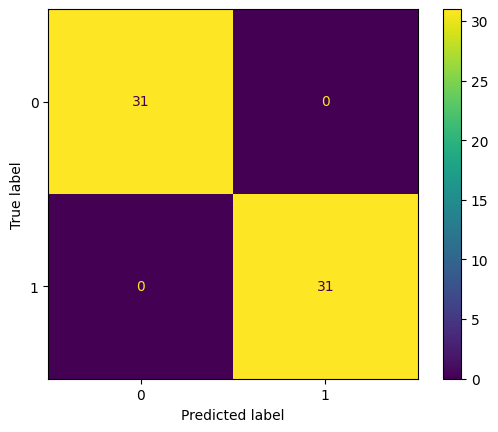

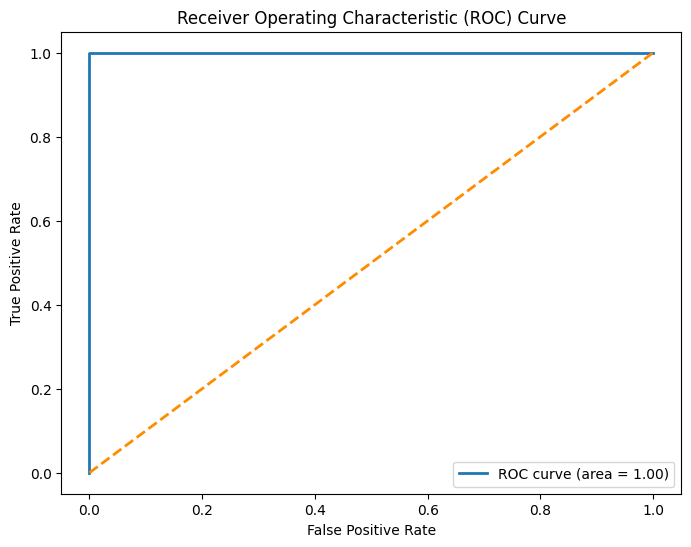

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize logistic regression model
log_reg = LogisticRegression(random_state=42)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict probabilities on the test data
y_pred_proba = log_reg.predict_proba(X_test)

# Predict binary labels on the test data
y_pred = log_reg.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()

# Create a table of evaluation metrics
metrics_table_log = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
              recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
})
print("\nEvaluation Metrics:")
print(metrics_table_log)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, log_reg.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


###**K Nearest Neighbour**

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62


Confusion Matrix:
[[31  0]
 [ 0 31]]

Evaluation Metrics:
      Metric  Score
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1-Score    1.0


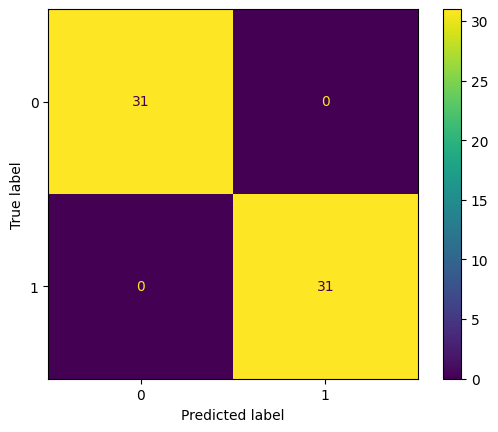

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict probabilities on the test data
y_pred_proba = knn.predict_proba(X_test)

# Predict binary labels on the test data
y_pred = knn.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()

# Create a table of evaluation metrics
metrics_table_knn = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
              recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
})
print("\nEvaluation Metrics:")
print(metrics_table_knn)


In [17]:
accuracy_score_knn = metrics_table_knn[metrics_table_knn['Metric'] == 'Accuracy']['Score'].iloc[0]
accuracy_score_knn

1.0

###**Decision Tree**

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62


Confusion Matrix:
[[31  0]
 [ 0 31]]

Evaluation Metrics:
      Metric  Score
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1-Score    1.0


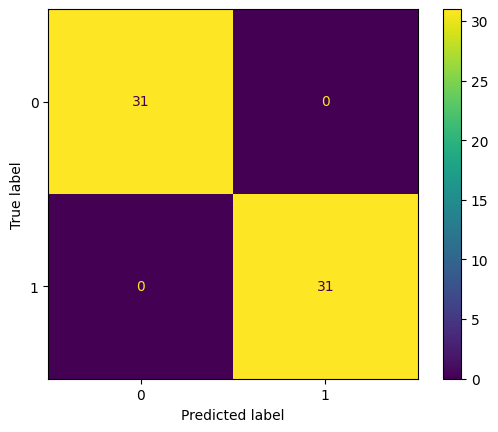

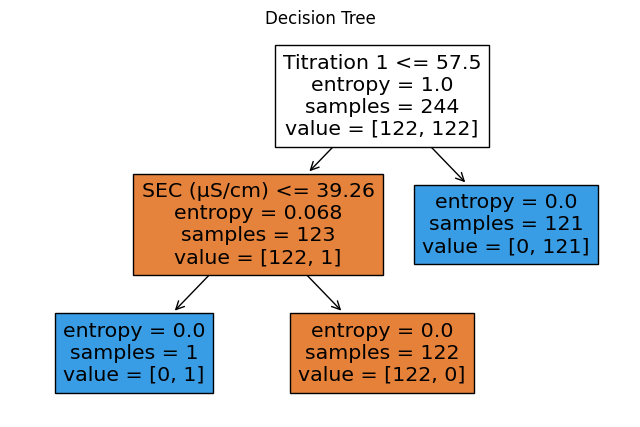

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion = "entropy", random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Predict probabilities on the test data
y_pred_proba = dt_classifier.predict_proba(X_test)

# Predict binary labels on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
# print('\n')

# Create a table of evaluation metrics
metrics_table_dt = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
              recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
})

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
print('==========================')

print("\nEvaluation Metrics:")
print(metrics_table_dt)
print('==========================')

# Visualize decision tree
plt.figure(figsize=(8, 5))
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns)
plt.title('Decision Tree')
plt.show()


###**Random Forest**

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62


Confusion Matrix:
[[31  0]
 [ 0 31]]

Evaluation Metrics:
      Metric  Score
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1-Score    1.0


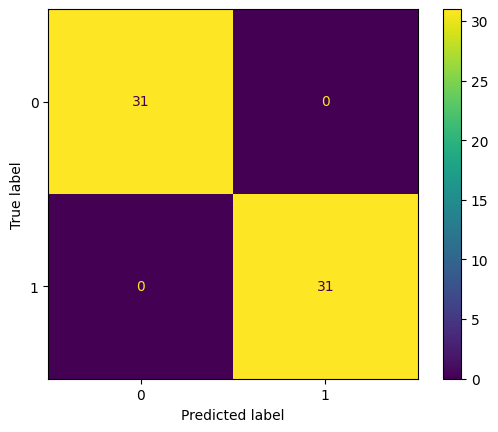

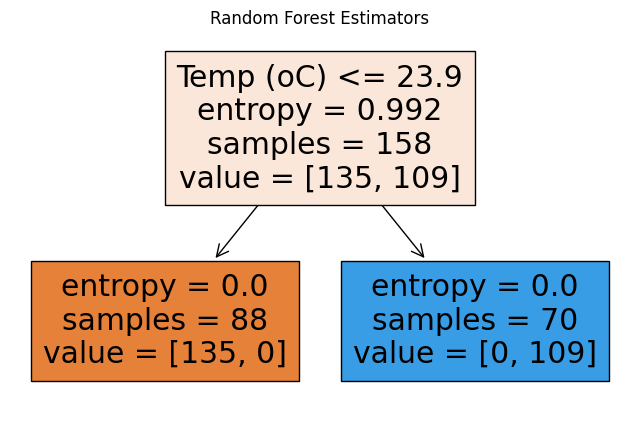

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42, max_depth = 2, n_estimators = 100, criterion = "entropy")

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict probabilities on the test data
y_pred_proba = rf_classifier.predict_proba(X_test)

# Predict binary labels on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()

# Create a table of evaluation metrics
metrics_table_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
              recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
})
print("\nEvaluation Metrics:")
print(metrics_table_rf)

# Visualize decision trees in the Random Forest
plt.figure(figsize=(8, 5))
for estimator in rf_classifier.estimators_:
    plot_tree(estimator, filled=True, feature_names=X_train.columns)
plt.title('Random Forest Estimators')
plt.show()


###**Adaboost**

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62


Confusion Matrix:
[[31  0]
 [ 0 31]]

Evaluation Metrics:
      Metric  Score
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1-Score    1.0


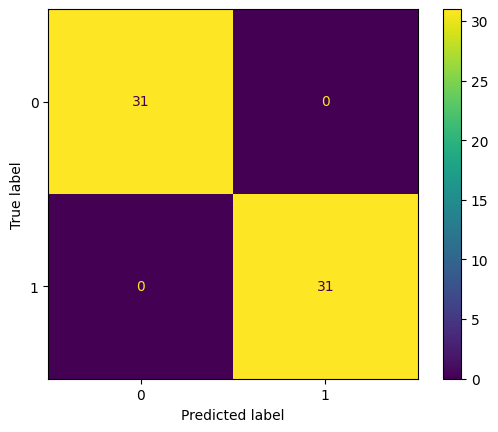

In [20]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost classifier with 50 estimators
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the model on the training data
adaboost.fit(X_train, y_train)

# Predict probabilities on the test data
y_pred_proba = adaboost.predict_proba(X_test)

# Predict binary labels on the test data
y_pred = adaboost.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()

# Create a table of evaluation metrics
metrics_table_ada = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
              recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
})
print("\nEvaluation Metrics:")
print(metrics_table_ada)


###**Gradient Boosting**

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62


Confusion Matrix:
[[31  0]
 [ 0 31]]

Evaluation Metrics:
      Metric  Score
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1-Score    1.0


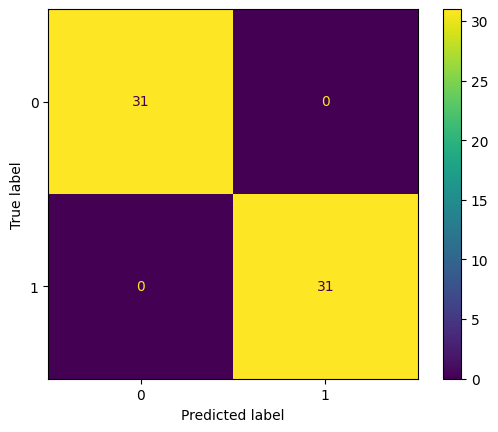

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier with 50 estimators
gradient_boosting = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Fit the model on the training data
gradient_boosting.fit(X_train, y_train)

# Predict probabilities on the test data
y_pred_proba = gradient_boosting.predict_proba(X_test)

# Predict binary labels on the test data
y_pred = gradient_boosting.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()

# Create a table of evaluation metrics
metrics_table_gb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
              recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
})
print("\nEvaluation Metrics:")
print(metrics_table_gb)


###**Support Vector Machine**

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        31

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62


Confusion Matrix:
[[31  0]
 [ 1 30]]

Evaluation Metrics:
      Metric     Score
0   Accuracy  0.983871
1  Precision  1.000000
2     Recall  0.967742
3   F1-Score  0.983607


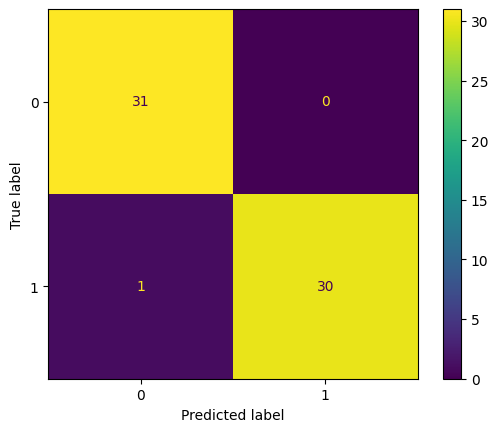

In [27]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier = SVC(kernel = 'linear', C=10, random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Predict binary labels on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()

# Create a table of evaluation metrics
metrics_table_sv = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
              recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
})
print("\nEvaluation Metrics:")
print(metrics_table_sv)

###**MultiLayer Perceptron**

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        31

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62


Confusion Matrix:
[[31  0]
 [ 0 31]]

Evaluation Metrics:
      Metric  Score
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1-Score    1.0


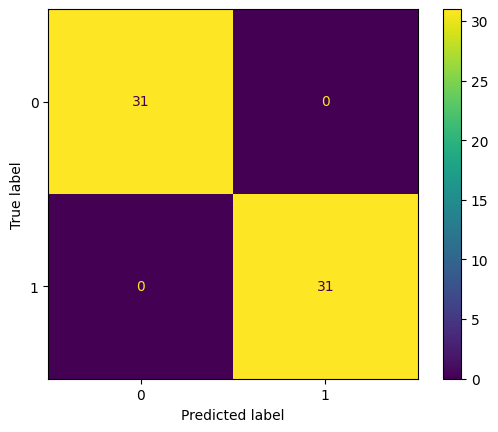

In [23]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP classifier
mlp_classifier = MLPClassifier(solver='adam', hidden_layer_sizes=(100, 200, 50, 70), random_state=42)

# Fit the model on the training data
mlp_classifier.fit(X_train, y_train)

# Predict binary labels on the test data
y_pred = mlp_classifier.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()

# Create a table of evaluation metrics
metrics_table_mlp = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
              recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
})
print("\nEvaluation Metrics:")
print(metrics_table_mlp)


###**Naive Bayes**

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        31

    accuracy                           0.98        62
   macro avg       0.98      0.98      0.98        62
weighted avg       0.98      0.98      0.98        62


Confusion Matrix:
[[31  0]
 [ 1 30]]

Evaluation Metrics:
      Metric     Score
0   Accuracy  0.983871
1  Precision  1.000000
2     Recall  0.967742
3   F1-Score  0.983607


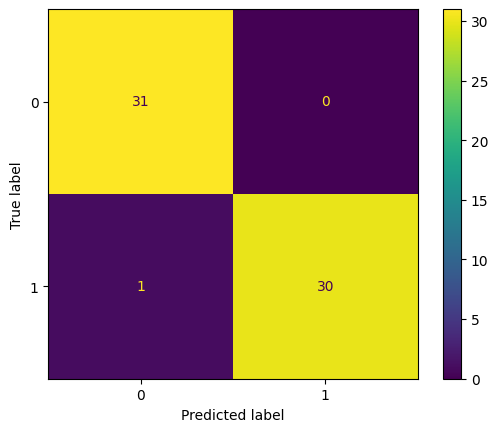

In [24]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes classifier
naive_bayes = GaussianNB()

# Fit the model on the training data
naive_bayes.fit(X_train, y_train)

# Predict probabilities on the test data
y_pred_proba = naive_bayes.predict_proba(X_test)

# Predict binary labels on the test data
y_pred = naive_bayes.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()

# Create a table of evaluation metrics
metrics_table_nb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
              recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
})
print("\nEvaluation Metrics:")
print(metrics_table_nb)


###**Conclusion**

In [25]:
# List of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# List of metrics tables
# metrics_tables = [metrics_table_log, metrics_table_knn, metrics_table_dt, metrics_table_rf,
#                   metrics_table_ada, metrics_table_gb, metrics_table_sv, metrics_table_mlp,
#                   metrics_table_nb]
metrics_tables = [metrics_table_log, metrics_table_knn, metrics_table_dt, metrics_table_rf,
                  metrics_table_gb, metrics_table_sv, metrics_table_nb]

# List of algorithm names
# algorithm_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest',
#                    'Adaboost', 'Gradient Boosted', 'SVM', 'MLP', 'Naive Bayes']
algorithm_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest',
                   'Gradient Boosted', 'SVM', 'Naive Bayes']

# Initialize lists to store scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Extract scores for each algorithm
for metric_table in metrics_tables:
    accuracy_scores.append(metric_table[metric_table['Metric'] == 'Accuracy']['Score'].iloc[0])
    precision_scores.append(metric_table[metric_table['Metric'] == 'Precision']['Score'].iloc[0])
    recall_scores.append(metric_table[metric_table['Metric'] == 'Recall']['Score'].iloc[0])
    f1_scores.append(metric_table[metric_table['Metric'] == 'F1-Score']['Score'].iloc[0])

# Create a dictionary with the extracted values
data = {
    "Algorithm": algorithm_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores
}

# Create a DataFrame
results_table = pd.DataFrame(data)

# Display the table
results_table


,Algorithm,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,1.000000,1.0,1.000000,1.000000
1,KNN,1.000000,1.0,1.000000,1.000000
2,Decision Tree,1.000000,1.0,1.000000,1.000000
3,Random Forest,1.000000,1.0,1.000000,1.000000
4,Gradient Boosted,1.000000,1.0,1.000000,1.000000
5,SVM,0.983871,1.0,0.967742,0.983607
6,Naive Bayes,0.983871,1.0,0.967742,0.983607


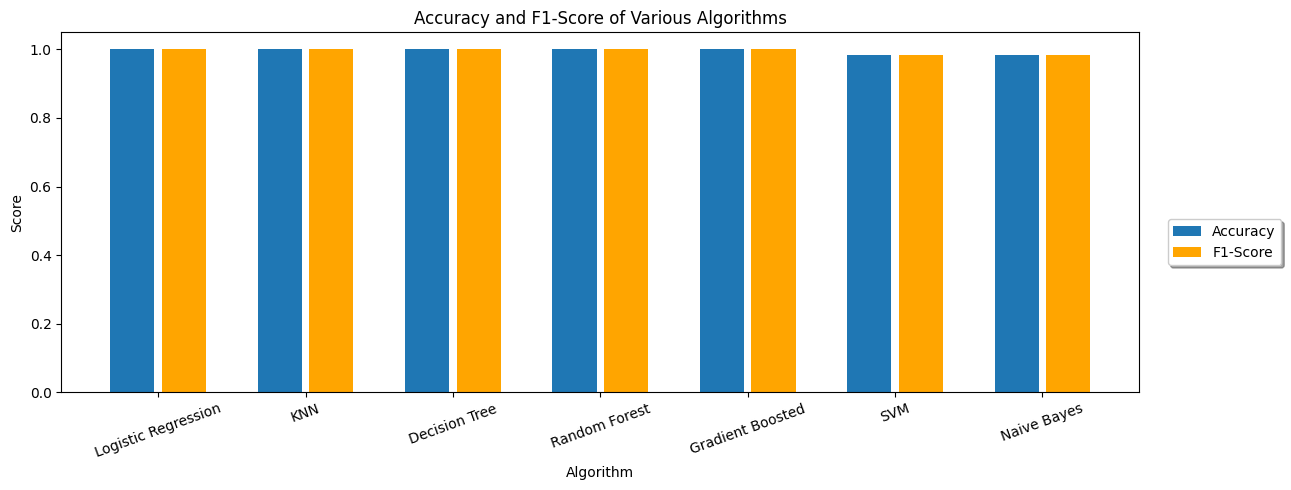

In [26]:
# Set the width of the bars
bar_width = 0.3
space = 0.05  # Space between accuracy and F1-score bars

# Plotting
plt.figure(figsize=(13, 5))

# Plot accuracy
plt.bar(np.arange(len(results_table['Algorithm'])), results_table['Accuracy'], label='Accuracy',width=bar_width)

# Plot F1-score with shifted x-coordinates
plt.bar(np.arange(len(results_table['Algorithm'])) + bar_width + space, results_table['F1-Score'], label='F1-Score', color='orange', width=bar_width)

# Adding labels and title
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Accuracy and F1-Score of Various Algorithms')
plt.xticks(np.arange(len(results_table['Algorithm'])) + bar_width / 2 + space / 2, results_table['Algorithm'], rotation=20)
# plt.legend(loc='lower right')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 0.5), shadow=True)

# plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
